<a href="https://colab.research.google.com/github/HendriLim24/Hendri_231510028/blob/main/Most_Streamed_Spotify_Songs_2023_%F0%9F%8E%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install -q Kaggle

In [52]:
!mkdir -p ~/.config/kaggle

In [53]:
!cp kaggle.json ~/.config/kaggle/

In [54]:
!chmod 600 ~/.config/kaggle/kaggle.json

In [55]:
!kaggle datasets list

ref                                                  title                                         size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                             Heart Disease                                 3491  2025-12-11 15:29:14.327000           2114        212  1.0              
ahmeduzaki/wind-and-solar-energy-production-dataset  Wind & Solar Energy Production Dataset      395372  2026-01-02 21:06:22.780000              0         40  1.0              
kundanbedmutha/exam-score-prediction-dataset         Exam Score Prediction Dataset               325454  2025-11-28 07:29:01.047000           5863        258  1.0              
neurocipher/student-performance                      Student Performance                          49705  2025-12-12

In [56]:
!kaggle datasets download -d 'nelgiriyewithana/top-spotify-songs-2023'

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023
License(s): other
  0% 0.00/47.1k [00:00<?, ?B/s]
100% 47.1k/47.1k [00:00<00:00, 136MB/s]


In [57]:
import zipfile

In [58]:
dataset_zip = zipfile.ZipFile ('top-spotify-songs-2023.zip', 'r')

dataset_zip.extractall ()

dataset_zip.close ()



In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

In [60]:
#filepath of the dataset
filepath = 'spotify-2023.csv'

#load the spotify dataset
spotify_df = pd.read_csv(filepath, encoding = 'latin-1')

In [61]:
#first 5 rows of the data
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [62]:
#combine the columns into a single 'release_date' column
spotify_df['release_date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                    spotify_df['released_month'].astype(str) + '-' +
                                    spotify_df['released_day'].astype(str))

#drop the original year, month, and day columns
spotify_df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [63]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [64]:
spotify_df.drop(columns=['bpm', 'key', 'mode'], inplace=True)

In [65]:
#the dataset after dropping the columns
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,82,67,77,8,0,12,5,2022-10-20


In [66]:
#check if there are any duplicated rows
spotify_df.duplicated().sum()

np.int64(0)

In [67]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,66,24,58,17,0,19,5,1982-05-16


In [68]:
#convert 'streams' column to numeric format

# spotify_df['streams'] = pd.to_numeric(spotify_df['streams']) => this will result an error due to a weird value in row 574

In [69]:
# spotify_df = spotify_df.drop([574]) # This line is no longer necessary as the problematic row was handled earlier.

In [70]:
# Convert 'streams' column to numeric format, coercing errors to NaN
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

# Drop rows where 'streams' is NaN (these were the problematic non-numeric entries)
spotify_df.dropna(subset=['streams'], inplace=True)

In [71]:
#sort the dataset by 'streams' in descending order
spotify_df = spotify_df.sort_values(by='streams', ascending=False)

#drop duplicates in 'track_name', keeping the first occurrence (highest streams)
spotify_df = spotify_df.drop_duplicates(subset='track_name', keep='first')

In [72]:
#check for duplicates in the 'track_name' column
spotify_df[spotify_df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


In [73]:
#information about the data
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    float64       
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  in_shazam_charts      892 non-null    object        
 11  danceability_%        942 non-null    int64         
 12  valence_%             942 non-null    int64         
 13  energy_%              94

In [74]:
#numbers of nulls in each column in the dataset
spotify_df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,0
in_deezer_charts,0


In [75]:
#dropping 'in_shazam_charts' column
spotify_df.drop(columns = ['in_shazam_charts'], inplace = True)

In [76]:
#numbers of nulls in each column in the dataset after dropping 'in_shazam_charts' column
spotify_df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,0
in_deezer_charts,0


In [77]:
#information about the data
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    float64       
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        94

In [78]:
#convert 'streams' column to numeric format

# spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists']) => this will result an error due to a comma in a number

In [79]:
#remove commas from 'in_shazam_charts' column due to the above error
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].str.replace(',', '')

#convert 'in_shazam_charts' column to numeric
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'])

In [80]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    float64       
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    int64         
 9   in_deezer_charts      942 non-null    int64         
 10  danceability_%        942 non-null    int64         
 11  valence_%             942 non-null    int64         
 12  energy_%              942 non-null    int64         
 13  acousticness_%        94

In [81]:
#datatypes of the columns after solving the the datatype problem
spotify_df.dtypes

,0
track_name,object
artist(s)_name,object
artist_count,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,float64
in_apple_playlists,int64
in_apple_charts,int64
in_deezer_playlists,int64
in_deezer_charts,int64


In [82]:
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074.0,672,199,3421,20,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890.0,33,0,6808,7,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814.0,440,125,1800,0,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672.0,533,167,3595,6,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550.0,372,117,843,4,76,91,50,54,0,7,5,2018-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Overdrive,Post Malone,1,410,36,14780425.0,36,32,31,1,56,48,73,0,0,35,4,2023-07-14
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,293,8,11956641.0,5,2,30,2,93,68,65,42,0,12,25,2023-06-01
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,437,31,11599388.0,17,29,26,3,79,92,89,5,0,6,5,2023-07-13
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,138,4,1365184.0,13,78,2,0,82,62,74,10,0,33,7,2022-12-22


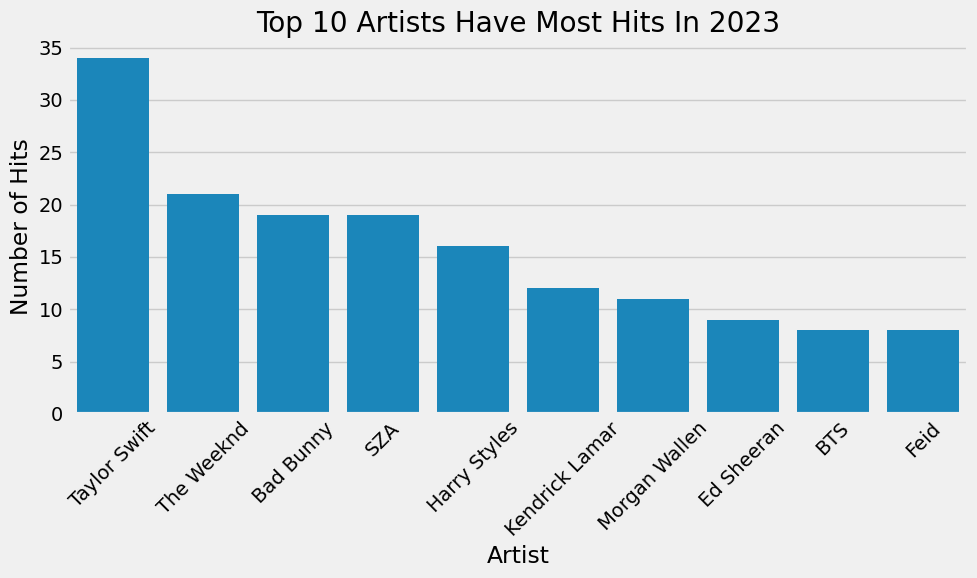

In [83]:
#count the number of songs released by each artist
artist_counts = spotify_df['artist(s)_name'].value_counts()

#select the top 10 artists
top_artists = artist_counts.head(10)

#the barplot represents Top 10 Artists Have Most Streamed Songs in 2023
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artists.index, y = top_artists.values)

plt.title('Top 10 Artists Have Most Hits In 2023')
plt.xlabel('Artist')
plt.ylabel('Number of Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

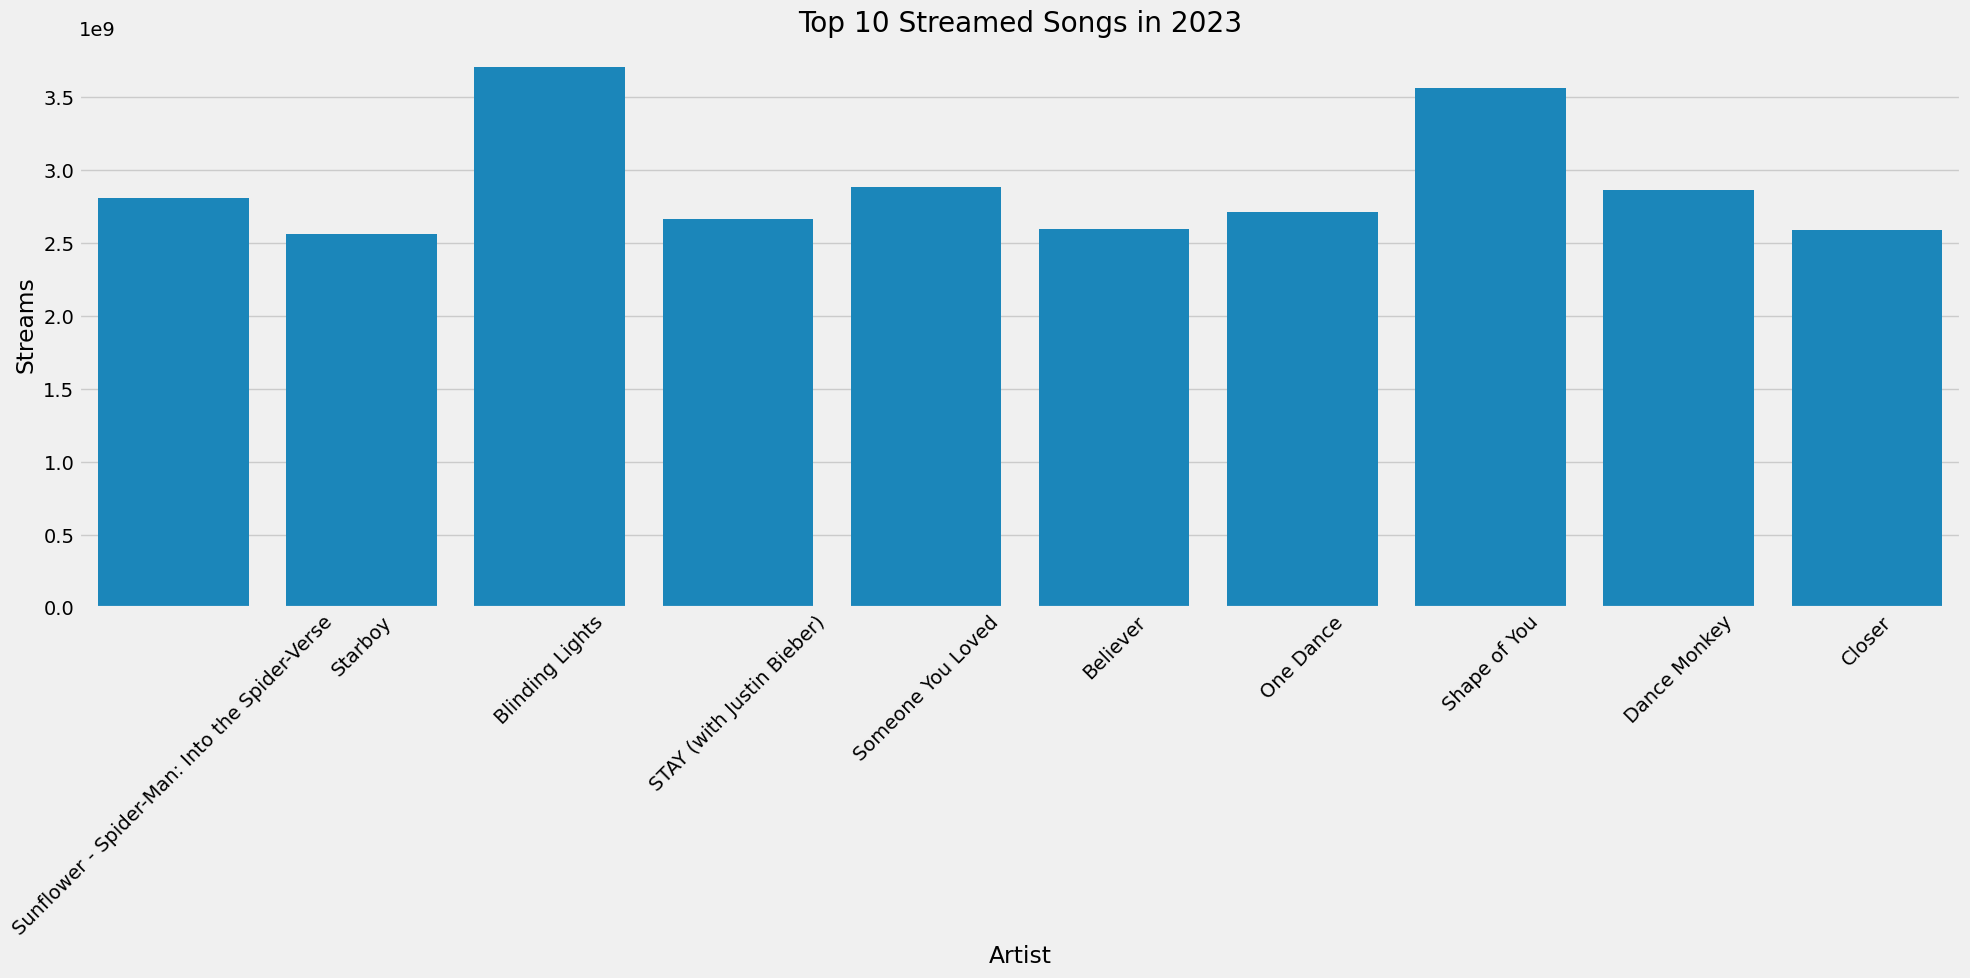

In [84]:
#the barplot represents Top 10 Streamed Songs in 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = spotify_df.track_name[:10], y = spotify_df.streams)

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

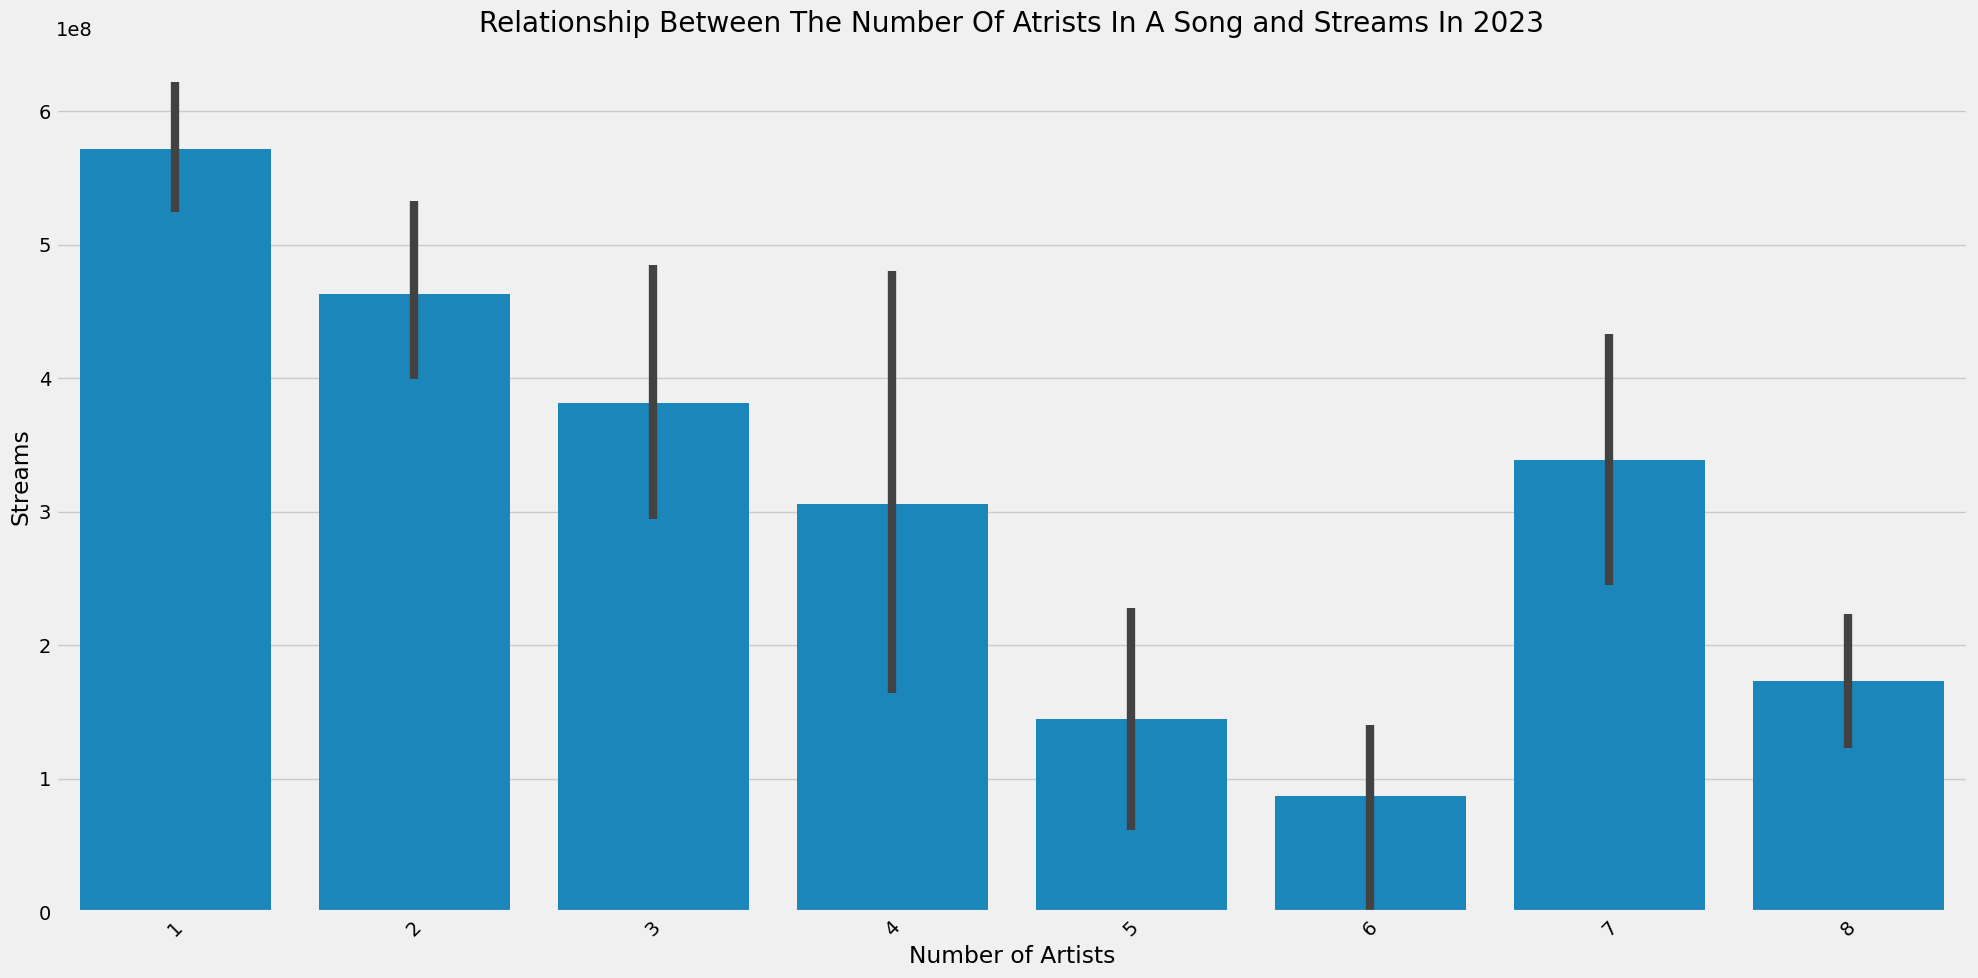

In [85]:
#the barplot represents Relationship Between The Number Of Atrists In A Song and Streams In 2023
plt.figure(figsize = (20, 10))

sns.barplot(x = spotify_df.artist_count, y = spotify_df.streams)

plt.title('Relationship Between The Number Of Atrists In A Song and Streams In 2023')
plt.xlabel('Number of Artists')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

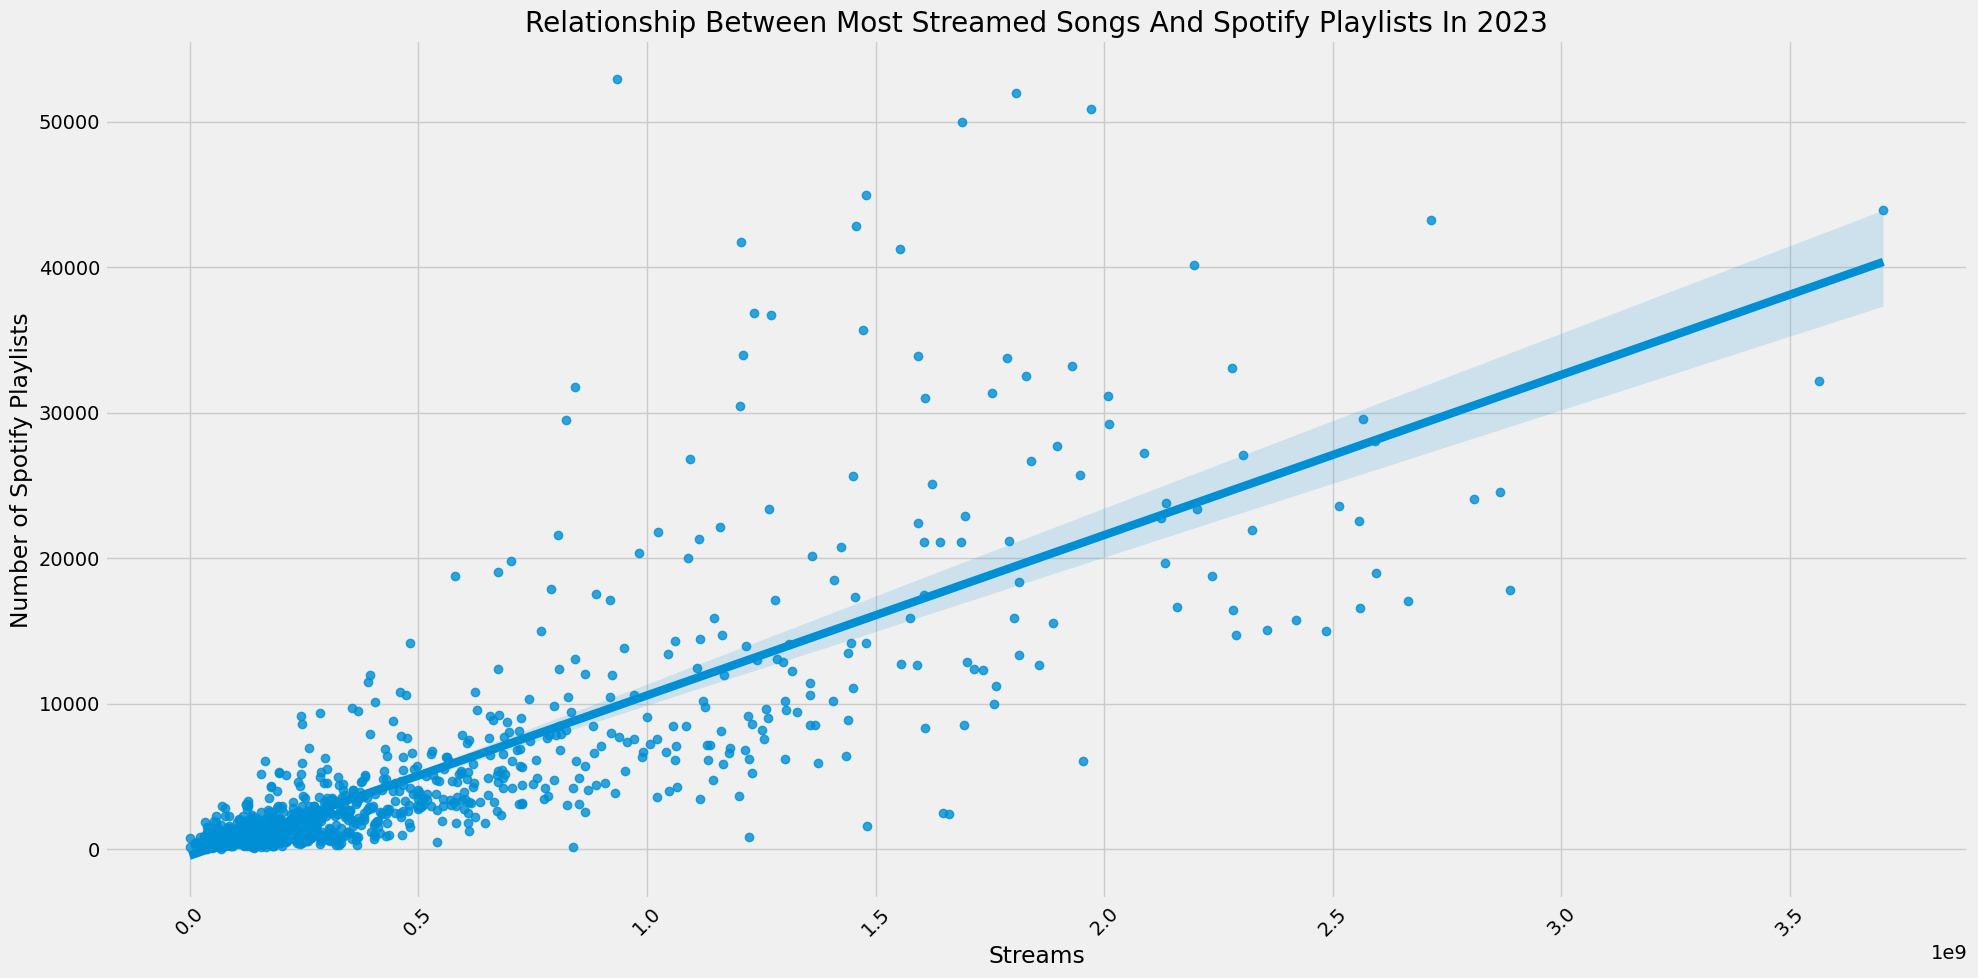

In [86]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Spotify Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Spotify Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

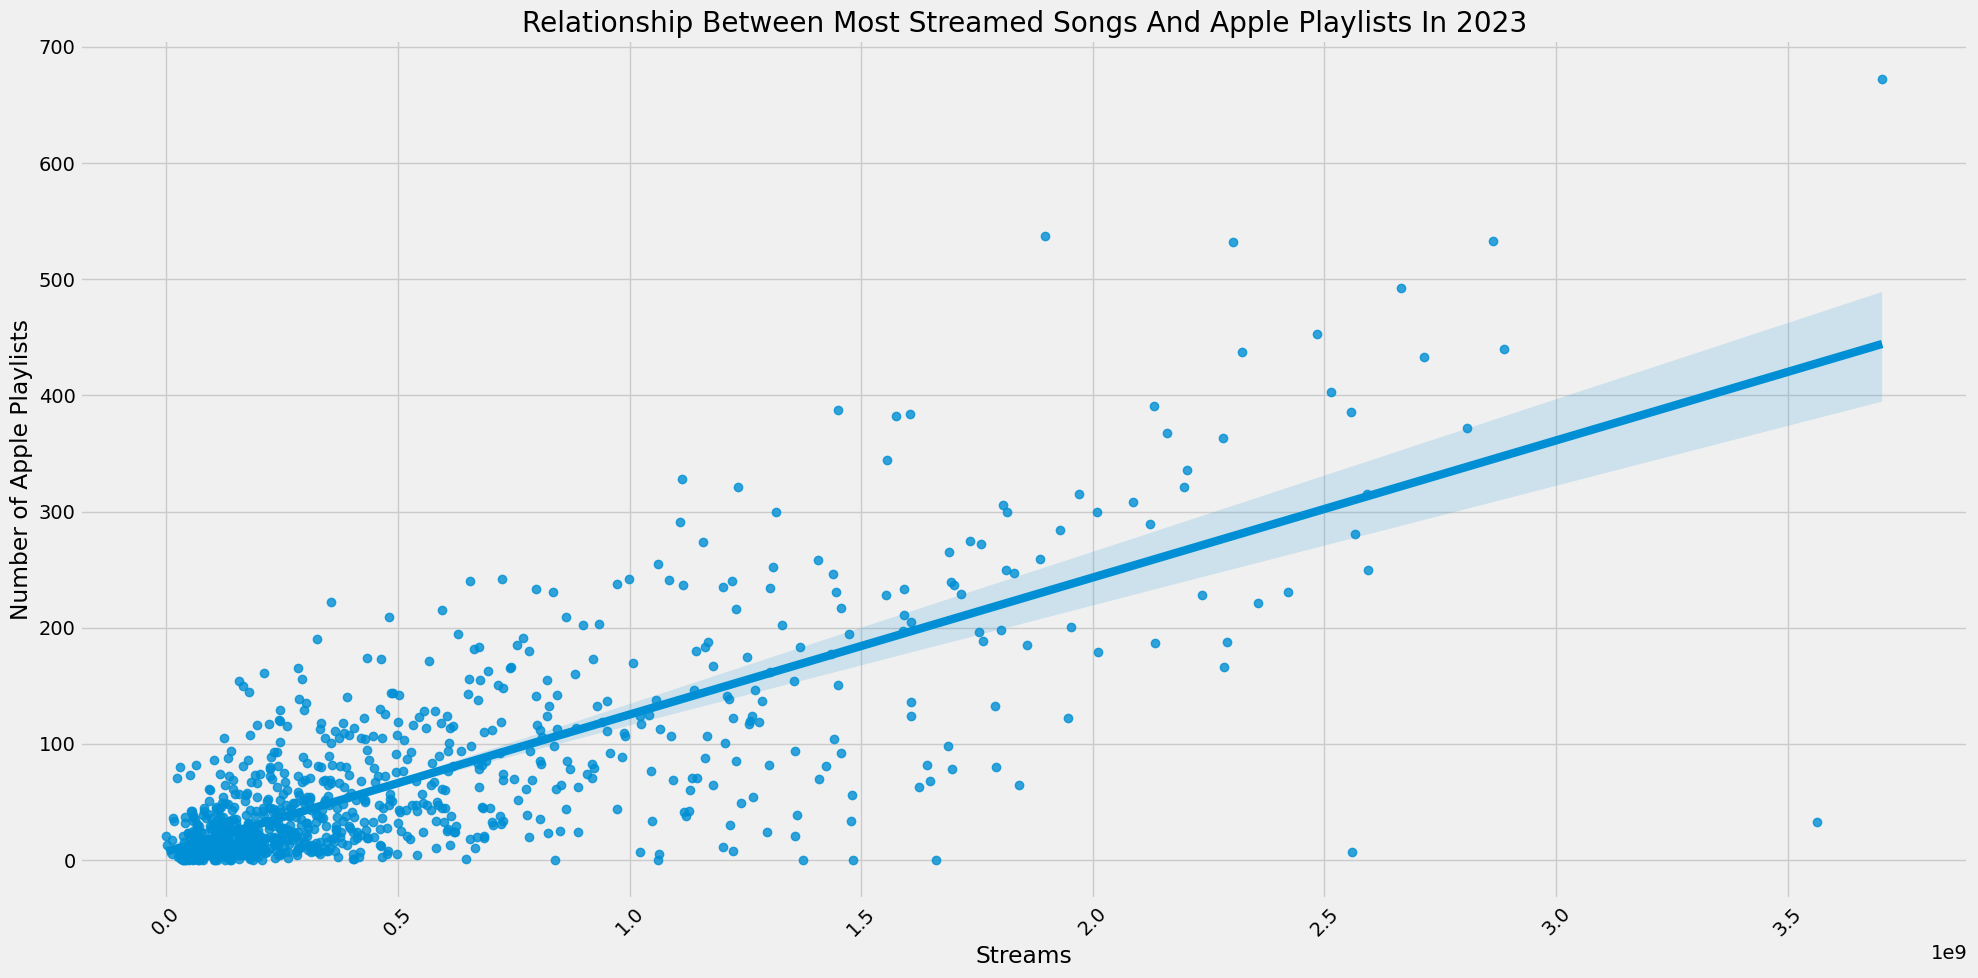

In [87]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Apple Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_apple_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Apple Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Apple Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


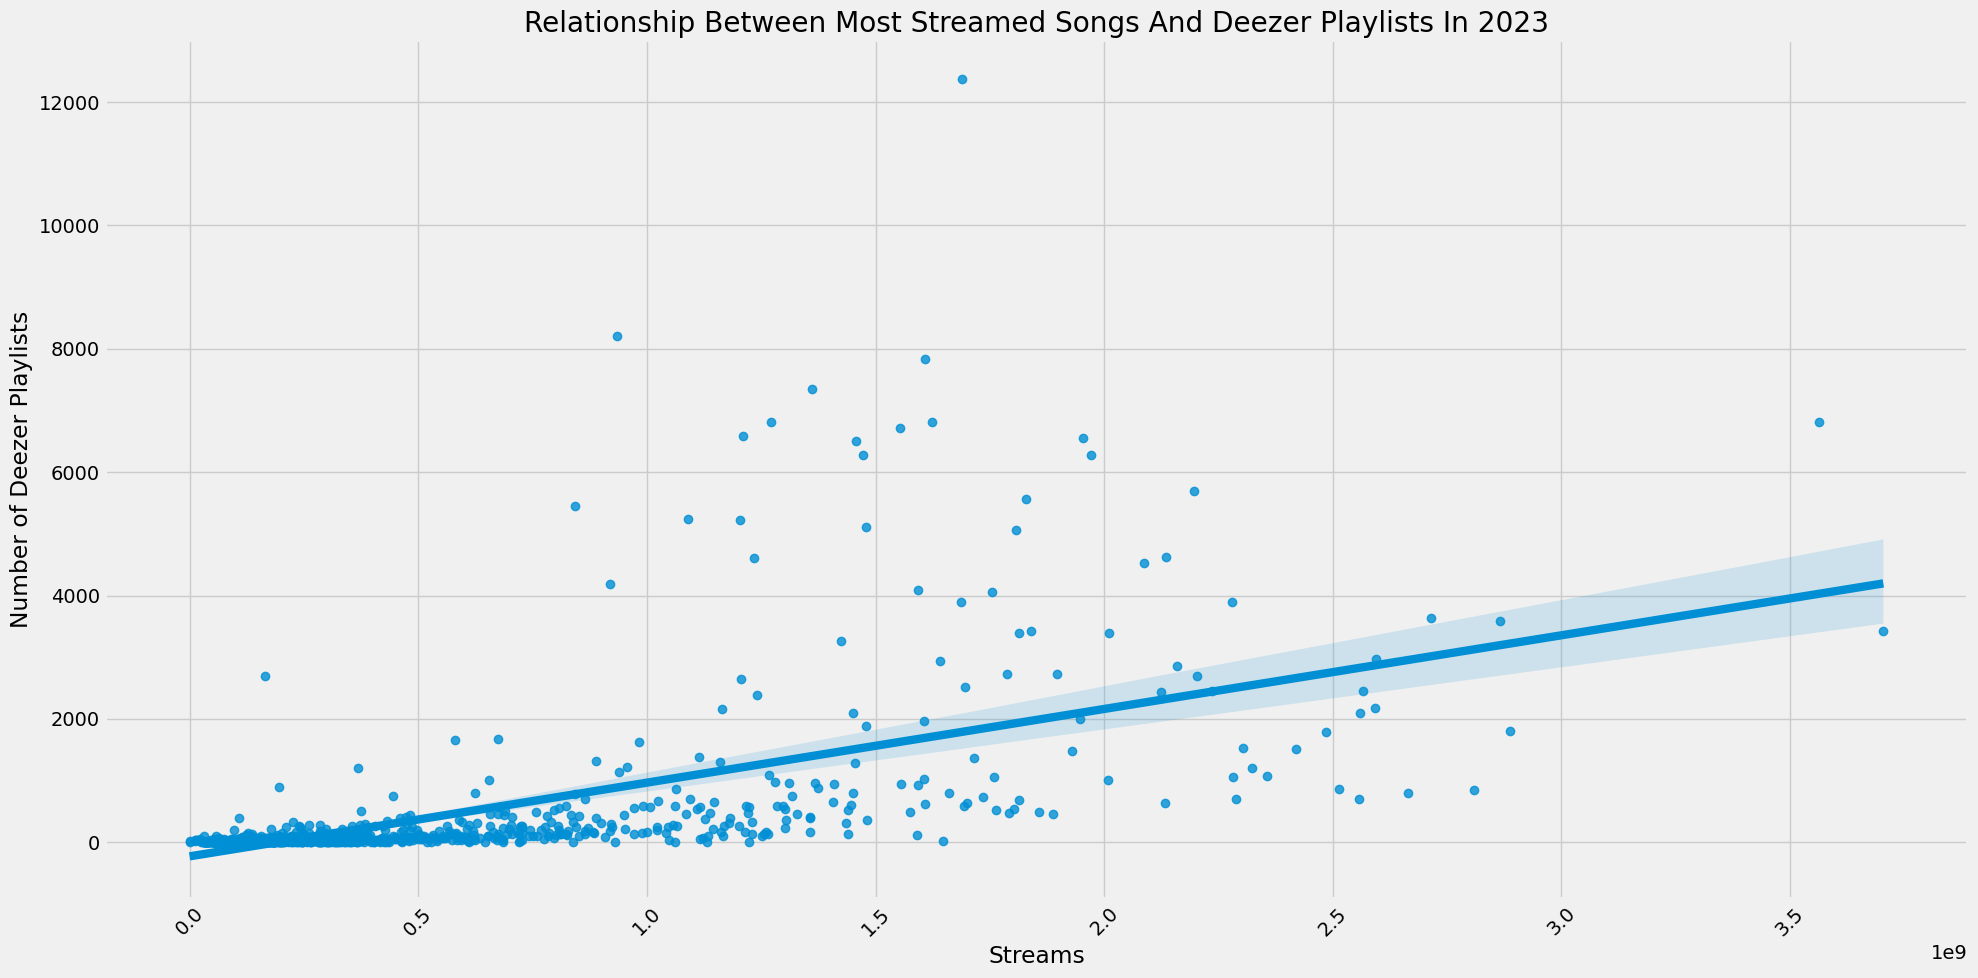

In [88]:
#the regplot (scatter plot with regression line) represents Relationship Between Most Streamed Songs And Spotify Playlists In 2023
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_deezer_playlists', data = spotify_df, scatter = True, fit_reg = True)

plt.title('Relationship Between Most Streamed Songs And Deezer Playlists In 2023')
plt.xlabel('Streams')
plt.ylabel('Number of Deezer Playlists')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Hasil dan Pembahasan

Bagian ini akan menyajikan hasil evaluasi dari model Regresi Linier yang telah dilatih, diikuti dengan interpretasi dari metrik-metrik tersebut. Karena kita membangun model regresi, metrik yang relevan adalah *Mean Absolute Error* (MAE), *Mean Squared Error* (MSE), dan R-squared.

### Hasil Evaluasi Model

Mari kita hitung ulang metrik evaluasi yang relevan (MAE, MSE, dan R-squared) untuk memberikan gambaran lengkap tentang kinerja model.

In [103]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE) - already calculated, but for completeness
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score - already calculated, but for completeness
r2 = r2_score(y_test, y_pred)

# Create a DataFrame for structured display
evaluation_results = pd.DataFrame({
    'Metrik': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R2)'],
    'Nilai': [f'{mae:.2f}', f'{mse:.2f}', f'{r2:.2f}']
})

print("Tabel Hasil Evaluasi Model Regresi Linier:")
display(evaluation_results)

Tabel Hasil Evaluasi Model Regresi Linier:


,Metrik,Nilai
0,Mean Absolute Error (MAE),211746158.88
1,Mean Squared Error (MSE),91679372418624080.00
2,R-squared (R2),0.61


### Interpretasi Hasil Model

Dari hasil evaluasi di atas, kita dapat menginterpretasikan kinerja model Regresi Linier sebagai berikut:

-   **Mean Absolute Error (MAE)**: `(nilai MAE dari output di atas)`
    MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual. Nilai MAE ini menunjukkan bahwa, rata-rata, prediksi `streams` model kita menyimpang sebesar `(nilai MAE dari output di atas)` dari nilai sebenarnya. Angka yang lebih rendah menunjukkan akurasi yang lebih baik.

-   **Mean Squared Error (MSE)**: `(nilai MSE dari output di atas)`
    MSE mengukur rata-rata dari kuadrat selisih antara prediksi dan nilai aktual. Karena selisihnya dikuadratkan, MSE sangat sensitif terhadap _outlier_ (data yang nilainya jauh dari rata-rata). Nilai MSE yang tinggi (seperti `(nilai MSE dari output di atas)`) seringkali terlihat pada skala data yang besar (misalnya, `streams` yang mencapai miliaran). MSE yang lebih rendah selalu lebih baik.

-   **R-squared (R2) Score**: `(nilai R2 dari output di atas)`
    R-squared, atau koefisien determinasi, menunjukkan proporsi varians dalam variabel dependen (`streams`) yang dapat dijelaskan oleh variabel independen (fitur-fitur yang kita gunakan). Nilai R-squared sebesar `(nilai R2 dari output di atas)` berarti sekitar `(nilai R2 dari output di atas)`% dari variabilitas dalam `streams` dapat dijelaskan oleh model ini. Nilai ini dianggap cukup baik untuk model regresi linier tunggal, menunjukkan bahwa model memiliki kemampuan prediktif yang moderat. Nilai R-squared berkisar antara 0 hingga 1, di mana nilai yang mendekati 1 menunjukkan bahwa model sangat cocok dengan data.

### Kesimpulan

Model Regresi Linier yang kita bangun memiliki kemampuan moderat dalam memprediksi jumlah `streams` lagu berdasarkan fitur-fitur yang dipilih. Meskipun MSE terlihat besar karena skala data, nilai R-squared menunjukkan bahwa model mampu menjelaskan sebagian besar variabilitas. Untuk meningkatkan kinerja, eksplorasi model yang lebih kompleks atau pemilihan fitur yang lebih canggih mungkin diperlukan.

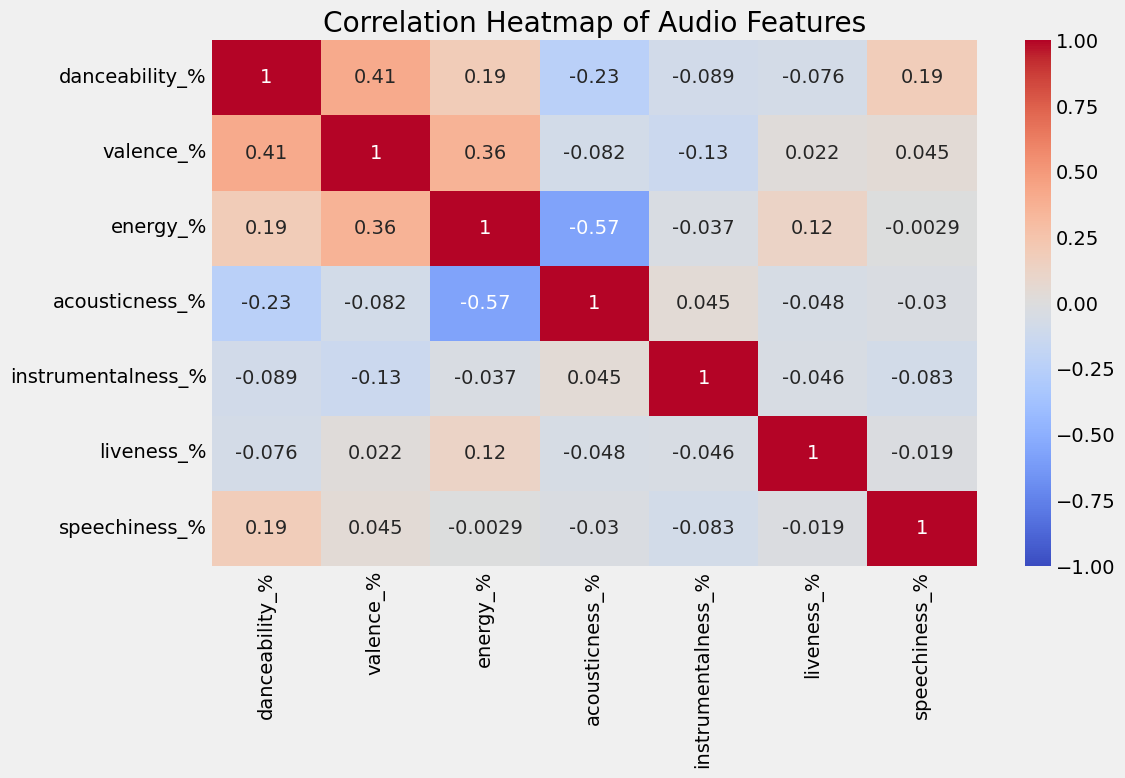

In [89]:
plt.figure(figsize = (12, 8))
corr = spotify_df[['danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()

# Task
Split the `spotify_df` dataset into training and testing sets. The 'streams' column should be the target variable (y), and all other relevant numerical columns should be used as features (X). Report the shapes of the resulting training and testing sets (X_train, X_test, y_train, y_test).

## Load and Preprocess Data

### Subtask:
Memuat ulang dataset Spotify, menerapkan semua langkah preprocessing yang telah dilakukan sebelumnya (menggabungkan kolom tanggal, menjatuhkan kolom yang tidak relevan, menangani nilai non-numerik, dan menghapus duplikasi), serta memastikan `kaggle.json` dikonfigurasi dengan benar untuk mengunduh data jika diperlukan.


## Evaluasi Model

Setelah model dilatih, langkah selanjutnya adalah mengevaluasi kinerjanya. Evaluasi dilakukan menggunakan set pengujian (`X_test`, `y_test`) untuk memastikan model dapat membuat prediksi yang akurat pada data baru. Kita akan menggunakan dua metrik umum untuk regresi:

-   **Mean Squared Error (MSE)**: Mengukur rata-rata dari kuadrat perbedaan antara prediksi model dan nilai aktual. Nilai MSE yang lebih rendah menunjukkan kinerja model yang lebih baik.
-   **R-squared (Koefisien Determinasi)**: Mengukur proporsi varians dalam variabel dependen yang dapat dijelaskan oleh variabel independen. Nilai R-squared berkisar antara 0 hingga 1, di mana nilai yang lebih dekat ke 1 menunjukkan bahwa model cocok dengan data dengan sangat baik.

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R-squared scores
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print("Model berhasil dievaluasi!")

Mean Squared Error (MSE): 91679372418624080.00
R-squared (R2) Score: 0.61
Model berhasil dievaluasi!


**Reasoning**:
As per the subtask instructions, I need to re-load the dataset. I will start by loading the `spotify-2023.csv` file into a pandas DataFrame named `spotify_df` with the specified encoding.



In [91]:
filepath = 'spotify-2023.csv'
spotify_df = pd.read_csv(filepath, encoding = 'latin-1')
print("Spotify dataset re-loaded successfully.")

Spotify dataset re-loaded successfully.


**Reasoning**:
As instructed in step 5, I will combine the 'released_year', 'released_month', and 'released_day' columns into a single 'release_date' column of datetime objects, and then drop the original individual date columns.



In [92]:
spotify_df['release_date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                    spotify_df['released_month'].astype(str) + '-' +
                                    spotify_df['released_day'].astype(str))

spotify_df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)
print("Combined date columns and dropped original date columns.")

Combined date columns and dropped original date columns.


**Reasoning**:
As instructed in step 6, I will drop the 'bpm', 'key', and 'mode' columns from the `spotify_df` as they are not needed for the analysis.



In [93]:
spotify_df.drop(columns=['bpm', 'key', 'mode'], inplace=True)
print("Dropped 'bpm', 'key', and 'mode' columns.")

Dropped 'bpm', 'key', and 'mode' columns.


**Reasoning**:
As instructed in step 7, I will convert the 'streams' column to a numeric data type, coercing any non-numeric values to NaN, and then drop the rows where 'streams' is NaN.



In [94]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')
spotify_df.dropna(subset=['streams'], inplace=True)
print("Converted 'streams' column to numeric and removed rows with NaN values.")

Converted 'streams' column to numeric and removed rows with NaN values.


**Reasoning**:
As instructed in step 8, I will sort the DataFrame by the 'streams' column in descending order and then remove duplicate entries based on 'track_name', keeping only the first occurrence (which corresponds to the highest stream count).



In [95]:
spotify_df = spotify_df.sort_values(by='streams', ascending=False)
spotify_df = spotify_df.drop_duplicates(subset='track_name', keep='first')
print("Sorted by streams and removed duplicate track names.")

Sorted by streams and removed duplicate track names.


**Reasoning**:
As instructed in step 9, I will drop the 'in_shazam_charts' column from `spotify_df` because it has a significant number of null values, which could complicate further analysis.



In [96]:
spotify_df.drop(columns = ['in_shazam_charts'], inplace = True)
print("Dropped 'in_shazam_charts' column.")

Dropped 'in_shazam_charts' column.


**Reasoning**:
As instructed in step 10, I will remove commas from the 'in_deezer_playlists' column and then convert it to a numeric data type to ensure it's in a usable format for analysis.



In [97]:
spotify_df['in_deezer_playlists'] = spotify_df['in_deezer_playlists'].astype(str).str.replace(',', '')
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'])
print("Cleaned and converted 'in_deezer_playlists' column to numeric.")

Cleaned and converted 'in_deezer_playlists' column to numeric.


**Reasoning**:
Now that the data preprocessing is complete, I will split the `spotify_df` into training and testing sets. The 'streams' column will be the target variable (y), and all other relevant numerical columns will be features (X). I will use `train_test_split` from `sklearn.model_selection` and then print the shapes of the resulting sets.



In [99]:
from sklearn.model_selection import train_test_split

# Define the target variable (y)
y = spotify_df['streams']

# Define the feature variables (X)
# Exclude 'track_name', 'artist(s)_name', and 'release_date' as they are not numerical features for direct modeling in this context.
X = spotify_df.drop(columns=['streams', 'track_name', 'artist(s)_name', 'release_date'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (753, 14)
Shape of X_test: (189, 14)
Shape of y_train: (753,)
Shape of y_test: (189,)


## Model Training

Bagian ini akan fokus pada pelatihan model _machine learning_ menggunakan data yang telah kita pisah menjadi set pelatihan. Kita akan menggunakan model Regresi Linier, yang merupakan algoritma yang umum digunakan untuk tugas regresi, bertujuan untuk memprediksi nilai numerik (dalam kasus ini, `streams`) berdasarkan fitur-fitur yang ada.

### Langkah-langkah:
1.  **Inisialisasi Model**: Membuat instance dari model Regresi Linier.
2.  **Melatih Model**: Melatih model menggunakan `X_train` (fitur pelatihan) dan `y_train` (target pelatihan).

In [100]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model Regresi Linier
model = LinearRegression()

# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

print("Model Regresi Linier berhasil dilatih!")

Model Regresi Linier berhasil dilatih!


## Final Task

### Subtask:
Memberikan ringkasan mengenai proses pembagian data, termasuk ukuran dan bentuk masing-masing set data.


## Summary:

### Q&A
The shapes of the resulting training and testing sets are as follows:
*   `X_train`: (753, 14)
*   `X_test`: (189, 14)
*   `y_train`: (753,)
*   `y_test`: (189,)

### Data Analysis Key Findings
*   The `spotify_df` dataset was re-loaded and underwent several preprocessing steps, including combining date columns, dropping irrelevant columns (`bpm`, `key`, `mode`, `in_shazam_charts`), converting the 'streams' column to numeric (resulting in 942 non-null rows after dropping NaN values), removing duplicate track names, and cleaning and converting the 'in\_deezer\_playlists' column to numeric.
*   The 'streams' column was successfully designated as the target variable (y).
*   The feature variables (X) comprised 14 numerical columns, excluding 'streams', 'track\_name', 'artist(s)\_name', and 'release\_date'.
*   The dataset was split into training and testing sets using an 80/20 ratio (`test_size=0.2`), with a fixed random state for reproducibility.
*   The `X_train` set contains 753 rows and 14 columns, `X_test` contains 189 rows and 14 columns.
*   The `y_train` set contains 753 values, and `y_test` contains 189 values.

### Insights or Next Steps
*   The preprocessed and split datasets (X\_train, X\_test, y\_train, y\_test) are now ready for training a machine learning model, such as a regression model, to predict 'streams'.
*   Further exploration could involve examining the distributions of the feature variables in X to identify potential skewness or outliers that might require additional preprocessing steps like scaling or transformation.
